<a href="https://colab.research.google.com/github/arashakbari1234/Data-Mining/blob/main/exercise%202_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing

In [ ]:
df = pd.read_csv('./drive/MyDrive/Data Mining Course - Exercises/pd_speech_features.csv')

In [ ]:
df.head(10)

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
6,1,0,0.5078,0.78744,0.65451,226,221,0.007631204,0.002696381,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.225,1
7,2,1,0.76095,0.62145,0.54543,322,321,0.005990989,0.000107266,0.00222,...,117.2678,75.3156,32.0478,7.706,3.106,4.6206,12.8353,13.83,7.7693,1
8,2,1,0.83671,0.62079,0.51179,318,317,0.006073855,0.000135739,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.961,11.7552,18.0927,5.0448,1
9,2,1,0.80826,0.61766,0.50447,318,317,0.006057188,6.93E-05,0.00161,...,2.264,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.843,1


In [ ]:
df.columns = df.iloc[0]
df.drop(0, axis=0, inplace=True)
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
df.isnull().sum()

0
id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 756
Columns: 755 entries, id to class
dtypes: object(755)
memory usage: 4.4+ MB


In [ ]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756,756,756,756,756,756,756,756,756,756,...,756,756,756,756,756,756,756,756,756,756
unique,252,2,740,745,748,315,319,755,646,358,...,749,755,752,753,749,752,753,753,754,2
top,0,1,0.82273,0.72248,0.62128,237,236,0.006004477,7.17E-05,0.00076,...,1.7726,4.0251,2.8454,4.2105,2.6829,3.1144,12.595,4.2391,3.2941,1
freq,3,390,3,2,2,9,8,2,3,9,...,2,2,2,2,2,2,2,2,2,564


In [ ]:
y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)

## Constant '1' Model

In [ ]:
y_pred = ['1'] * len(y_test)
confusion_matrix(y_test, y_pred)

array([[  0,  58],
       [  0, 169]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.74      1.00      0.85       169

    accuracy                           0.74       227
   macro avg       0.37      0.50      0.43       227
weighted avg       0.55      0.74      0.64       227



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 42,  16],
       [  6, 163]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        58
           1       0.91      0.96      0.94       169

    accuracy                           0.90       227
   macro avg       0.89      0.84      0.86       227
weighted avg       0.90      0.90      0.90       227



In [ ]:
test_error_rates = []

for k in range(1, 100):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_X_train, y_train)

  y_pred_test = knn_model.predict(scaled_X_test)

  test_error = 1-accuracy_score(y_test, y_pred_test)

  test_error_rates.append(test_error)

Text(0.5, 0, 'K Neighbors')

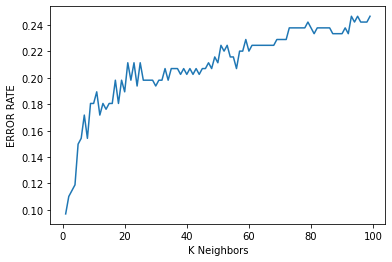

In [ ]:
plt.plot(range(1,100), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [ ]:
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
operations = [('scaler',scaler), ('knn',knn)]
pipe = Pipeline(operations)
k_values = list(range(1,50))
param_grid = {'knn__n_neighbors':k_values, 'knn__metric':['euclidean','manhattan'],
              'knn__weights':['uniform','distance']}

full_cv_classifier = GridSearchCV(pipe, param_grid, cv=8, scoring='accuracy')

full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
full_cv_classifier.best_estimator_.get_params()

{'knn': KNeighborsClassifier(metric='manhattan', n_neighbors=1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=1))],
 'verbose': False}

In [ ]:
full_pred = full_cv_classifier.predict(X_test)
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        58
           1       0.94      0.99      0.97       169

    accuracy                           0.95       227
   macro avg       0.96      0.90      0.93       227
weighted avg       0.95      0.95      0.95       227



In [ ]:
print("Train accuracy:",full_cv_classifier.score(X_train,y_train))
print("Test accuracy:",full_cv_classifier.score(X_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.947136563876652


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


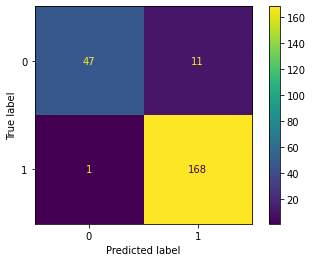

In [ ]:
plot_confusion_matrix(full_cv_classifier, X_test, y_test)

## Random Forrest

In [ ]:
y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
n_estimators = [64,100,128,200]
# max_features = [2,3,4,6, 32, 64, 100, 300, 500, len(df.columns)]
bootstrap = [True,False]
oob_score = [True,False]
param_grid = {'n_estimators':n_estimators,
              'oob_score':oob_score}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [ ]:
grid.best_params_

{'n_estimators': 128, 'oob_score': False}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, grid_preds)

array([[ 35,  23],
       [  5, 164]])

In [ ]:
print("Train accuracy:",grid.score(scaled_X_train,y_train))
print("Test accuracy:",grid.score(scaled_X_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.8766519823788547


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


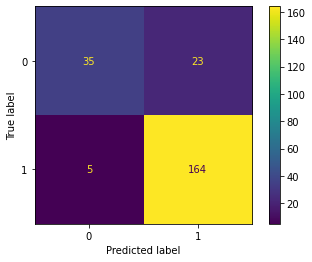

In [ ]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.88      0.60      0.71        58
           1       0.88      0.97      0.92       169

    accuracy                           0.88       227
   macro avg       0.88      0.79      0.82       227
weighted avg       0.88      0.88      0.87       227



## Decision Tree

In [ ]:
y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[64,100,128,200, 300, 500, 600, len(df.columns)]}
model = DecisionTreeClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [64, 100, 128, 200, 300, 500, 600, 755]})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 100}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, grid_preds)

array([[ 36,  22],
       [ 24, 145]])

In [ ]:
print("Train accuracy:",grid.score(scaled_X_train,y_train))
print("Test accuracy:",grid.score(scaled_X_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.7973568281938326


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


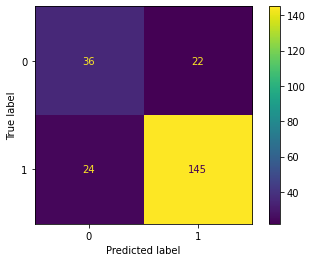

In [ ]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61        58
           1       0.87      0.86      0.86       169

    accuracy                           0.80       227
   macro avg       0.73      0.74      0.74       227
weighted avg       0.80      0.80      0.80       227



## SVM

In [ ]:
y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.2,0.5,1], 'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'], 'degree':[2,3,4]}
svm = SVC()
grid = GridSearchCV(svm,param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid.best_params_

{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, grid_preds)

array([[ 36,  22],
       [ 18, 151]])

In [ ]:
print("Train accuracy:",grid.score(scaled_X_train,y_train))
print("Test accuracy:",grid.score(scaled_X_test,y_test))

Train accuracy: 0.9792060491493384
Test accuracy: 0.8237885462555066


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


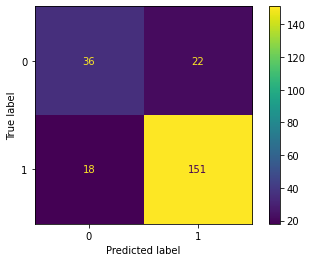

In [ ]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        58
           1       0.87      0.89      0.88       169

    accuracy                           0.82       227
   macro avg       0.77      0.76      0.76       227
weighted avg       0.82      0.82      0.82       227



## PCA

In [ ]:
y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
explained_variance = []
for n in range(1,753):
  pca = PCA(n_components=n)
  pca.fit(X)

  explained_variance.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Variance Explained')

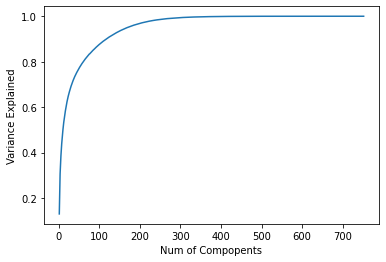

In [ ]:
plt.plot(range(1,753), explained_variance)
plt.xlabel('Num of Compopents')
plt.ylabel('Variance Explained')

In [ ]:
pca_model = PCA(n_components=100)
pc_results = pca_model.fit_transform(X)
pca_model.components_
np.sum(pca_model.explained_variance_ratio_)

0.8763820928469889

## KNN with PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 42,  16],
       [  6, 163]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        58
           1       0.91      0.96      0.94       169

    accuracy                           0.90       227
   macro avg       0.89      0.84      0.86       227
weighted avg       0.90      0.90      0.90       227



In [ ]:
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
operations = [('scaler',scaler), ('knn',knn)]
pipe = Pipeline(operations)
k_values = list(range(1,50))
param_grid = {'knn__n_neighbors':k_values, 'knn__metric':['euclidean','manhattan'],
              'knn__weights':['uniform','distance']}

full_cv_classifier = GridSearchCV(pipe, param_grid, cv=8, scoring='accuracy')

full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
full_cv_classifier.best_estimator_.get_params()

{'knn': KNeighborsClassifier(metric='manhattan', n_neighbors=1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=1))],
 'verbose': False}

In [ ]:
full_pred = full_cv_classifier.predict(X_test)
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        58
           1       0.94      0.99      0.97       169

    accuracy                           0.95       227
   macro avg       0.96      0.90      0.93       227
weighted avg       0.95      0.95      0.95       227



In [ ]:
print("Train accuracy:",full_cv_classifier.score(X_train,y_train))
print("Test accuracy:",full_cv_classifier.score(X_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.947136563876652


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


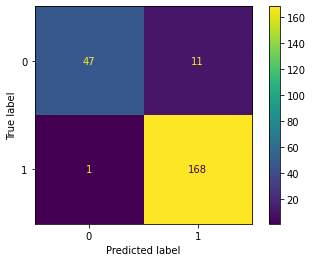

In [ ]:
plot_confusion_matrix(full_cv_classifier, X_test, y_test)

## Random Forrest With PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
n_estimators = [32,64, 80, 100, 128]
max_features = [2,3,4,6, 32, 64, 100]
bootstrap = [True,False]
oob_score = [True,False]
param_grid = {'n_estimators':n_estimators,
              'oob_score':oob_score}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [32, 64, 80, 100, 128],
                         'oob_score': [True, False]})

In [ ]:
grid.best_params_

{'n_estimators': 100, 'oob_score': False}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, grid_preds)

array([[ 33,  25],
       [  5, 164]])

In [ ]:
print("Train accuracy:",grid.score(scaled_X_train,y_train))
print("Test accuracy:",grid.score(scaled_X_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.8678414096916299


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


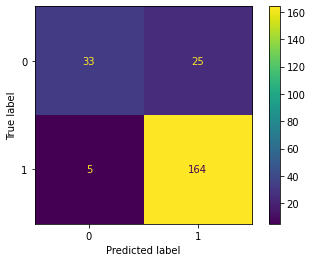

In [ ]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69        58
           1       0.87      0.97      0.92       169

    accuracy                           0.87       227
   macro avg       0.87      0.77      0.80       227
weighted avg       0.87      0.87      0.86       227



## Decision Tree with PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[20, 32,64,80,100]}
model = DecisionTreeClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 32, 64, 80, 100]})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 32}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, grid_preds)

array([[ 36,  22],
       [ 21, 148]])

In [ ]:
print("Train accuracy:",grid.score(scaled_X_train,y_train))
print("Test accuracy:",grid.score(scaled_X_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.8105726872246696


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


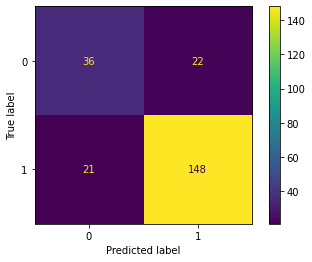

In [ ]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63        58
           1       0.87      0.88      0.87       169

    accuracy                           0.81       227
   macro avg       0.75      0.75      0.75       227
weighted avg       0.81      0.81      0.81       227



## SVM with PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.2,0.5,1], 'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'], 'degree':[2,3,4]}
svm = SVC()
grid = GridSearchCV(svm,param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid.best_params_

{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, grid_preds)

array([[ 36,  22],
       [ 18, 151]])

In [ ]:
print("Train accuracy:",grid.score(scaled_X_train,y_train))
print("Test accuracy:",grid.score(scaled_X_test,y_test))

Train accuracy: 0.9792060491493384
Test accuracy: 0.8237885462555066


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


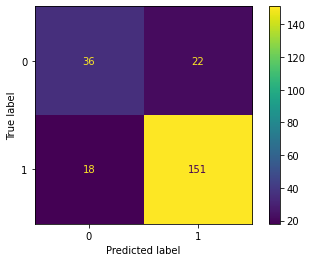

In [ ]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        58
           1       0.87      0.89      0.88       169

    accuracy                           0.82       227
   macro avg       0.77      0.76      0.76       227
weighted avg       0.82      0.82      0.82       227

